<a href="https://colab.research.google.com/github/IsabelJnz/NLP-Sentiment-Analysis/blob/main/ChatGPT_NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on the Tweets

###Installations

In [2]:
%pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.0/884.0 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 71.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=559642b695c149010df6902e32c5c8ff4878aa0ecb8ccf71ec2fa4a7aedc8a6c
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


###Imports

In [4]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly_express as px
import numpy as np
import nltk
from textblob import TextBlob
import torch
from transformers import pipeline

from google.colab import drive

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Reading the cleaned tweets csv

In [7]:
with open('/content/drive/MyDrive/NLP/cleaned_tweets_time_emoji', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = [row for row in reader]

df = pd.DataFrame(data, columns=header)

In [8]:
df.head()

,clean_text,clean_hashtags,date,emojis
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06 17:26:19+00:00,
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06 17:26:18+00:00,
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06 17:26:16+00:00,
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06 17:26:12+00:00,
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06 17:26:05+00:00,


##Subjectivity and Polarity

The **subjectivity** attribute is a float value between 0 and 1 that represents the degree of subjectivity of the text, where 0 is the most objective text and 1 is the most subjective text. The subjectivity score is calculated based on the presence of subjective language in the text, such as opinions, evaluations, and beliefs.

The **polarity** attribute is a float value between -1 and 1 that represents the degree of sentiment polarity, where -1 is the most negative sentiment, 0 is neutral sentiment, and 1 is the most positive sentiment. The polarity score is calculated based on a set of pre-defined polarity values for common words in the English language, and takes into account the context of the words in the text.

Together, the polarity and subjectivity attributes provide a measure of the sentiment of a piece of text, as well as the degree of objectivity or subjectivity in the language used. For example, a text with a high polarity and a low subjectivity score might be a factual statement with a strong sentiment, while a text with a low polarity and a high subjectivity score might be a subjective opinion with a weak sentiment.

In [9]:
# using TextBlob to calculate subjectivity and polarity in the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [10]:
df['subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['polarity'] = df['clean_text'].apply(getPolarity)

In [11]:
df.head()

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06 17:26:19+00:00,,0.0,0.00
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06 17:26:18+00:00,,0.6,-0.05
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06 17:26:16+00:00,,0.0,0.00
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06 17:26:12+00:00,,0.0,0.00
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06 17:26:05+00:00,,0.0,0.00


In [12]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [13]:
sub_grouped = df.groupby('date').agg({'subjectivity': 'mean'}) 

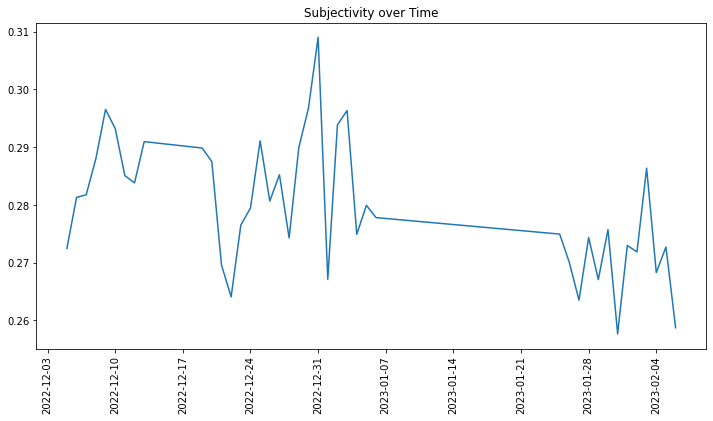

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sub_grouped.index, sub_grouped['subjectivity'])
plt.xticks(rotation=90) 
plt.title('Subjectivity over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

In [15]:
pol_grouped = df.groupby('date').agg({'polarity': 'mean'}) 

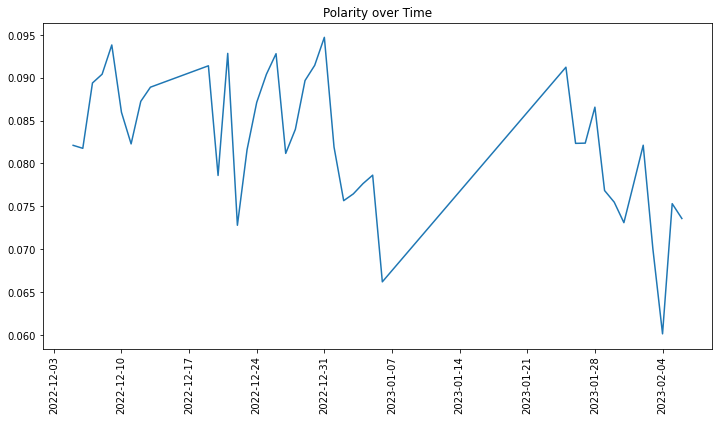

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(pol_grouped.index, pol_grouped['polarity'])
plt.xticks(rotation=90) 
plt.title('Polarity over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

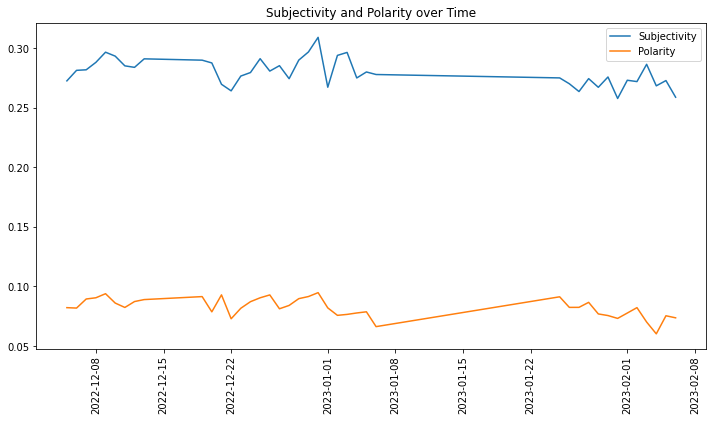

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sub_grouped.index, sub_grouped['subjectivity'], label='Subjectivity')
plt.plot(pol_grouped.index, pol_grouped['polarity'], label='Polarity')
plt.xticks(rotation=90)
plt.title('Subjectivity and Polarity over Time')
plt.legend()
plt.show()

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

df['vader_polarity'] = df['clean_text'].map(
    lambda text: sid.polarity_scores(text)['compound'])     

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
polarity_df = df[['polarity', 'vader_polarity']]
polarity_df

,polarity,vader_polarity
0,0.00,-0.4939
1,-0.05,0.0000
2,0.00,0.0000
3,0.00,0.0000
4,0.00,0.0000
...,...,...
127881,0.00,0.0000
127882,0.00,0.0000
127883,0.00,0.0000
127884,0.00,0.0000


In [20]:
polarity_df = polarity_df.rename(columns={'polarity': 'TextBlob',
                                          'vader_polarity': 'Vader'})

fig = px.histogram(polarity_df, x=['Vader', 'TextBlob'], nbins=40, barmode='group',
                   color_discrete_sequence=['#1DA1F2', '#EB8C17'])
fig.update_layout(title='Comparison of the distributions of sentimental polarities',
                  xaxis_title='Polarity', yaxis_title='Count')
fig.show()

=> this graph allows us to see that although Vader and TextBlob use a similar method, the results are not exactly the same. <br>
=> there is a slight shift on the positive side of the polarity.

In [21]:
polarity_df.describe()

,TextBlob,Vader
count,127886.000000,127886.000000
mean,0.081516,0.161816
std,0.256053,0.365462
min,-1.000000,-0.995900
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.166667,0.440400
max,1.000000,0.989100


## Using nltk.sentiment.vader for Sentiment Analysis

In [22]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
def vader_sentiment_result(sent):
    scores = sia.polarity_scores(sent)
    if scores['compound'] > 0.05:
      return 1
    elif scores['compound'] < -0.05:
      return -1
    else:
      return 0

In [25]:
df["sentiment_vader"] = df["clean_text"].apply(lambda x: vader_sentiment_result(x))

In [26]:
df.head(5)

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,vader_polarity,sentiment_vader
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,,0.0,0.00,-0.4939,-1
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,,0.6,-0.05,0.0000,0
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,,0.0,0.00,0.0000,0
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,,0.0,0.00,0.0000,0
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,,0.0,0.00,0.0000,0


In [27]:
# mapping the numbers from vader to words
label_map = {1: 'positive', 0: 'neutral', -1: 'negative'}
df['sentiment'] = df['sentiment_vader'].map(label_map)

In [28]:
df.head(5)

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,vader_polarity,sentiment_vader,sentiment
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,,0.0,0.00,-0.4939,-1,negative
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,,0.6,-0.05,0.0000,0,neutral
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,,0.0,0.00,0.0000,0,neutral
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,,0.0,0.00,0.0000,0,neutral
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,,0.0,0.00,0.0000,0,neutral


In [29]:
counts = df['sentiment'].value_counts()

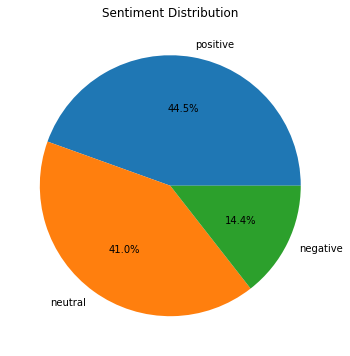

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', labels=counts.index)
plt.title('Sentiment Distribution')
plt.ylabel("");

=> 

###Looking at the sentiment over time

In [31]:
sentiment_grouped = df.groupby('date').agg({'sentiment_vader': 'mean'}) 

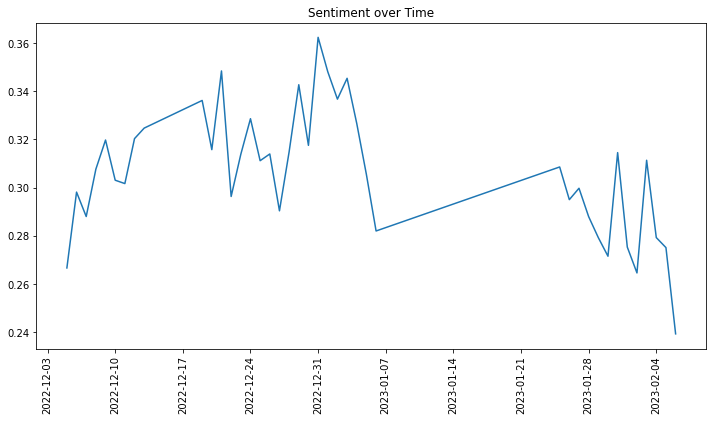

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sentiment_grouped.index, sentiment_grouped['sentiment_vader'])
plt.xticks(rotation=90) 
plt.title('Sentiment over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

=>

In [33]:
sentiment_grouped2 = df.groupby('date')['sentiment_vader'].agg(lambda x: x.mode().iloc[0])

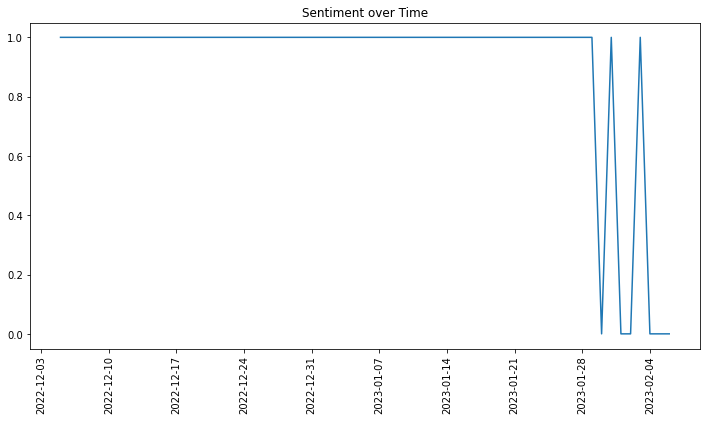

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(sentiment_grouped2.index, sentiment_grouped2)
plt.xticks(rotation=90) 
plt.title('Sentiment over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

=> 

## Using Hugging Face Zero Shot Classifier

The zero-shot-classification (ZSC) model from Hugging Face is a powerful and flexible tool for text classification tasks. It allows you to classify text into any number of categories, without the need to train a model specifically on those categories.

The performance of the ZSC model can vary depending on a number of factors, including the quality of the input data, the complexity of the classification task, and the choice of candidate labels. In general, the ZSC model can achieve high levels of accuracy on many text classification tasks, but may struggle with more nuanced or complex tasks, such as detecting sarcasm or irony.

One advantage of the ZSC model is its flexibility and ease of use. It allows you to quickly and easily classify text data using a pre-trained model, without needing to spend time and resources on model training and optimization. Additionally, the ZSC model can be fine-tuned on specific datasets to improve its performance on specific tasks, if necessary.

Overall, the ZSC model is a powerful and useful tool for many text classification tasks, but its performance will depend on the specific use case and the quality of the input data. It's always a good idea to evaluate the performance of any machine learning model on your specific use case, and to consider the limitations and potential biases of the model.

In [35]:
classifier = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
tweet_text = df['clean_text'][:100]

In [37]:
group_labels = ["education", "entertainment", "business"]
results = classifier(tweet_text, group_labels).to(device)
print(results)

AttributeError: ignored

In [ ]:
candidate_labels = ["afraid", "critical", "excited", "curious", "rejecting"]
results = classifier(tweet_text, candidate_labels)
print(results)

In [ ]:
# deciding on which attributes to take and using the model for the whole dataset

##Analysing the Emojis in the Tweets

In [38]:
emojis = df['emojis']
emojis

0            
1            
2            
3            
4            
         ... 
127881    🙏🙏🙏
127882       
127883       
127884       
127885       
Name: emojis, Length: 127886, dtype: object

In [39]:
emojis.replace('', np.nan, inplace=True)

In [40]:
emojis.isnull().sum()

110663

In [41]:
emojis.dropna(inplace=True)
emojis.reset_index(drop=True, inplace=True)

In [42]:
emojis.isnull().sum()

0

In [43]:
emojis.head()

0    🐋🐳🐋🐳👀
1        🔴
2        😁
3        😏
4        👉
Name: emojis, dtype: object

In [44]:
emojis = emojis.str.split('')
emojis = emojis.explode()

In [45]:
emojis.replace('', np.nan, inplace=True)
emojis.isnull().sum()

34446

In [46]:
emojis.dropna(inplace=True)
emojis.reset_index(drop=True, inplace=True)
emojis

0        🐋
1        🐳
2        🐋
3        🐳
4        👀
        ..
30614    😁
30615    😅
30616    🙏
30617    🙏
30618    🙏
Name: emojis, Length: 30619, dtype: object

In [47]:
# getting the most frequently used emoji
most_common_emoji = emojis.value_counts().index[0]
print('The most frequently used emoji is:', most_common_emoji)

The most frequently used emoji is: 😂


In [48]:
emoji_counts = emojis.value_counts()
emoji_counts.head(10)

😂    2404
👇    2388
🔥    1461
👉    1118
🚀    1082
👀     868
😅     790
🏻     541
😎     482
😉     443
Name: emojis, dtype: int64

In [49]:
# extracting the 10 most used emojis
top_10_emojis = emojis.value_counts().nlargest(10)
emoji_df = pd.DataFrame(top_10_emojis)

In [50]:
fig = px.bar(emoji_df, x=emoji_df.index, y='emojis', text='emojis')

fig.update_layout(title='The 10 most used emojis in the tweets')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.update_yaxes(tickvals=[])

fig.show()

##Clustering the text with K-Means

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# assume that your tweet texts are stored in a dataframe column called 'text'
# and you want to cluster them into 5 clusters
n_clusters = 5

# create a vectorizer to convert the tweet texts into numerical features
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000)

# fit the vectorizer on the tweet texts to learn the vocabulary and transform the texts into numerical features
X = vectorizer.fit_transform(df['clean_text'])

# create a k-means model and fit it on the numerical features
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

# assign the cluster labels to each tweet text
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [52]:
df

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,vader_polarity,sentiment_vader,sentiment,cluster
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,NaN,0.0,0.00,-0.4939,-1,negative,3
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,NaN,0.6,-0.05,0.0000,0,neutral,3
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,1
...,...,...,...,...,...,...,...,...,...,...
127881,,,2022-12-05,🙏🙏🙏,0.0,0.00,0.0000,0,neutral,3
127882,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3
127883,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3
127884,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3


##NCLERX

In [53]:
!pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=6d4e2f9e7fc0de22513f56aa3ad8331365168acdceed2715aae3a5ed12f44593
  Stored in directory: /root/.cache/pip/wheels/83/95/c0/42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built nrclex


In [54]:
from nrclex import NRCLex

In [55]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
df['Emotion'] = df['clean_text'].apply(emotion)
df.head()

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,vader_polarity,sentiment_vader,sentiment,cluster,Emotion
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,NaN,0.0,0.00,-0.4939,-1,negative,3,negative
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,NaN,0.6,-0.05,0.0000,0,neutral,3,No emotion
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3,anticipation
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3,No emotion
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,1,trust


In [58]:
df['Emotion'].value_counts()

positive        39496
No emotion      32950
trust           24075
fear            10466
negative         7372
anticipation     7039
anger            3489
surprise         2653
sadness           192
joy                90
disgust            64
Name: Emotion, dtype: int64

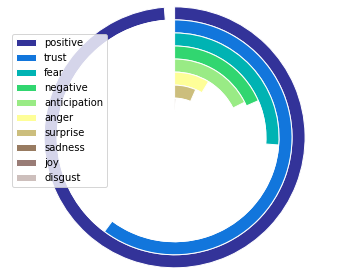

In [59]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

##Roberta Approach

In [80]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [81]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [82]:
import torch

In [83]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [84]:
print(device)

cuda


In [111]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [112]:
def softmax(x):
    e_x = torch.exp(x - torch.max(x))
    return e_x / e_x.sum()

In [123]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt').to(device)
    output = model(**encoded_text)
    scores = output[0][0]
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0].item(),
        'roberta_neu' : scores[1].item(),
        'roberta_pos' : scores[2].item()
    }
    return scores_dict

In [124]:
# add an id column to enumerate the rows
df['id'] = df.reset_index().index + 1

In [125]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    # try:
        text = row['clean_text']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    # except RuntimeError:
    #     print(f'Broke for id {myid}')

  0%|          | 0/127886 [00:00<?, ?it/s]

In [137]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = df.merge(results_df, how='left')

In [138]:
results_df

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,vader_polarity,sentiment_vader,sentiment,cluster,Emotion,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,NaN,0.0,0.00,-0.4939,-1,negative,3,negative,1,0.282,0.644,0.074,-0.4939,0.098003,0.833265,0.068733
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,NaN,0.6,-0.05,0.0000,0,neutral,3,No emotion,2,0.000,1.000,0.000,0.0000,0.248929,0.713522,0.037549
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3,anticipation,3,0.000,1.000,0.000,0.0000,0.115962,0.833322,0.050716
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,3,No emotion,4,0.000,1.000,0.000,0.0000,0.082326,0.869242,0.048432
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,NaN,0.0,0.00,0.0000,0,neutral,1,trust,5,0.000,1.000,0.000,0.0000,0.071527,0.852720,0.075753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127881,,,2022-12-05,🙏🙏🙏,0.0,0.00,0.0000,0,neutral,3,No emotion,127882,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433
127882,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3,No emotion,127883,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433
127883,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3,No emotion,127884,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433
127884,,,2022-12-05,NaN,0.0,0.00,0.0000,0,neutral,3,No emotion,127885,0.000,0.000,0.000,0.0000,0.258294,0.451272,0.290433


## Zero Shot Classification Approach

In [4]:
print(device)

cuda


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and zero-shot classification model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")
classifier = pipeline("zero-shot-classification", model=model.to(device), tokenizer=tokenizer)

# Move the PyTorch model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [7]:
tweet_text = ["This is a tweet about education", "This is a tweet about entertainment", "This is a tweet about business"]
group_labels = ["education", "entertainment", "business"]
# Perform zero-shot classification and move the resulting tensor to the GPU
results = classifier(tweet_text, group_labels)
results_tensor = torch.tensor(results['scores']).to(device)

print(results_tensor)

RuntimeError: ignored